### Pubg Weapon Analysis

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
pubg_weapon_df = pd.read_csv("pubg-weapon-stats.csv")

In [4]:
pubg_weapon_df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [5]:
pubg_weapon_df['Rate of Fire'] = 60 / pubg_weapon_df['Rate of Fire']

In [6]:
pubg_weapon_df.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'Fire Mode', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
       'HDMG_2', 'HDMG_3'],
      dtype='object')

In [7]:
pubg_weapon_df.shape

(44, 20)

In [8]:
pubg_weapon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

### Data Cleaning

In [9]:
# Checking For Any Duplicate Row

In [10]:
pubg_weapon_df.duplicated().value_counts()

False    44
Name: count, dtype: int64

In [11]:
pubg_weapon_df = pubg_weapon_df.dropna()
pubg_weapon_df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,750.000000,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,6000.000000,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,697.674419,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,6000.000000,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,697.674419,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


### Exploratory Data Analysis

### What is the distribution of weapon types in the dataset?

In [12]:
weapon_type = pubg_weapon_df.groupby("Weapon Type")

In [13]:
res1 = weapon_type["Weapon Name"].count().reset_index()
res1

,Weapon Type,Weapon Name
0,Assault Rifle,10
1,Designed Marksman Rifle,6
2,Light Machine Gun,2
3,Pistol,4
4,Shotgun,3
5,Sniper Rifle,4
6,Submachine Gun,6


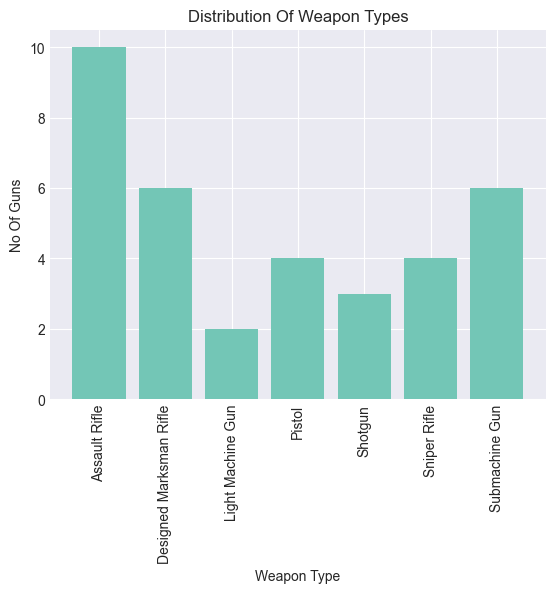

In [14]:
plt.bar(res1["Weapon Type"],res1["Weapon Name"],color="#73C6B6")
plt.xticks(rotation="vertical")
plt.title("Distribution Of Weapon Types")
plt.xlabel("Weapon Type")
plt.ylabel("No Of Guns")
plt.show()

##### most of the weapons are Assault Rifle

### Which bullet types are most common among the weapons?

In [15]:
pubg_weapon_df["Bullet Type"].value_counts().head(2)

Bullet Type
7.62    11
5.56     9
Name: count, dtype: int64

##### 7.62 and 5.56 are most common bullet types among the weapons

### Which weapon has the highest and lowest damage?

In [16]:
res = pubg_weapon_df.groupby("Weapon Name")["Damage"].max().sort_values(ascending=False).head(1).index[0]
res

'S686'

In [17]:
pubg_weapon_df.groupby("Weapon Name")["Damage"].min().sort_values().head(1).index[0]

'P18C'

##### S686 has highest damage(216) and P18C has lowest damage(23)

### How does damage vary across different weapon types?

In [18]:
res2 = pubg_weapon_df.groupby("Weapon Type")["Damage"].agg(["sum","mean","min","max"])
res2

,sum,mean,min,max
Weapon Type,,,,
Assault Rifle,452,45.200000,43,49
Designed Marksman Rifle,305,50.833333,41,61
Light Machine Gun,96,48.000000,45,51
Pistol,154,38.500000,23,55
Shotgun,630,210.000000,198,216
Sniper Rifle,325,81.250000,66,105
Submachine Gun,204,34.000000,26,40


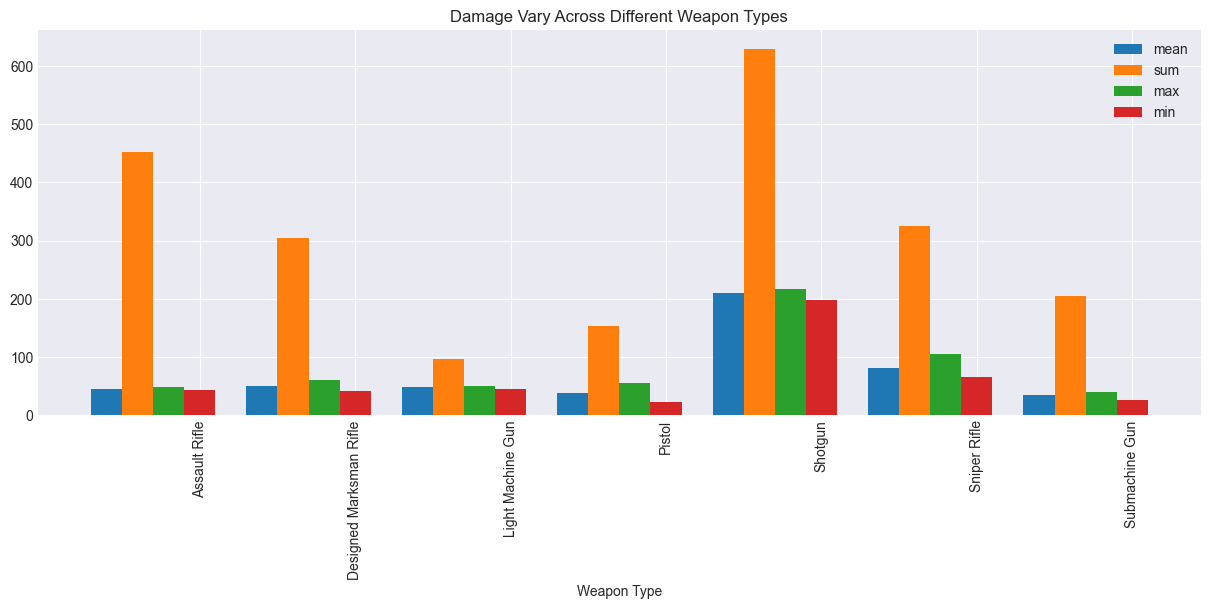

In [19]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(res2.shape[0])-0.6,res2["mean"],width=0.2,label='mean')
plt.bar(np.arange(res2.shape[0])-0.4,res2["sum"],width=0.2,label="sum")
plt.bar(np.arange(res2.shape[0])-0.2,res2["max"],width=0.2,label="max")
plt.bar(np.arange(res2.shape[0]),res2["min"],width=0.2,label="min")
plt.xticks(rotation="vertical")
plt.xticks(np.arange(res2.shape[0]),res2.index)
plt.legend()
plt.title("Damage Vary Across Different Weapon Types")
plt.xlabel("Weapon Type")
plt.show()

##### Shotguns have significantly higher damage compared to other weapon types across all metrics (mean, max, sum, min) according to the bar chart. This highlights their high impact per shot relative to other weapons

### Which weapon has the highest magazine capacity?

In [20]:
pubg_weapon_df.groupby("Weapon Name")["Magazine Capacity"].max().sort_values(ascending=False).head(1).index[0]

'M249'

##### M249 has the highest magazine capacity of 100 

### How does bullet speed correlate with weapon range?

In [21]:
correlation = pubg_weapon_df["Bullet Speed"].corr(pubg_weapon_df["Range"])

In [22]:
correlation

0.8358163457823694

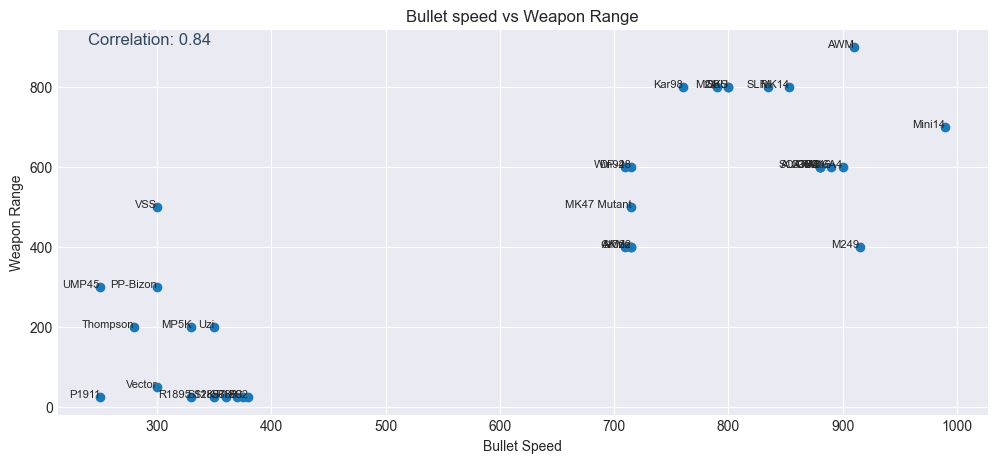

In [23]:
plt.figure(figsize=(12,5))
plt.scatter(pubg_weapon_df["Bullet Speed"],pubg_weapon_df["Range"])
plt.title("Bullet speed vs Weapon Range")
plt.xlabel("Bullet Speed")
plt.ylabel("Weapon Range")
for i in range(len(pubg_weapon_df)):
    bullet_speed = pubg_weapon_df["Bullet Speed"].iloc[i]
    weapon_range = pubg_weapon_df["Range"].iloc[i]
    weapon_name = pubg_weapon_df["Weapon Name"].iloc[i]
    plt.text(bullet_speed,weapon_range,weapon_name,ha="right",fontsize=8)
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='#34495E')
plt.show()

##### weapons with higher bullet speeds generally have longer ranges.

### What is the range of magazine capacities for different weapon types?

In [24]:
# Range=Maximum Capacity−Minimum Capacity

In [25]:
def range(group):
    max_capacity = group["Magazine Capacity"].max()
    min_capacity = group["Magazine Capacity"].min()
    return max_capacity-min_capacity

In [26]:
pubg_weapon_df.groupby("Weapon Type").apply(range,include_groups=False).reset_index()

,Weapon Type,0
0,Assault Rifle,0
1,Designed Marksman Rifle,10
2,Light Machine Gun,53
3,Pistol,10
4,Shotgun,3
5,Sniper Rifle,0
6,Submachine Gun,34


##### some weapon type have same range of magazine capacity and other have variety of magazine capacity

### Which weapon has the highest rate of fire?

In [27]:
pubg_weapon_df.groupby('Weapon Name')["Rate of Fire"].max().sort_values(ascending=False).reset_index()

,Weapon Name,Rate of Fire
0,AKM,6000.000000
1,MK47 Mutant,6000.000000
2,VSS,6000.000000
3,SLR,6000.000000
4,SKS,6000.000000
5,M16A4,6000.000000
6,QBU,6000.000000
7,Mini14,6000.000000
8,Uzi,1250.000000
9,Vector,1090.909091


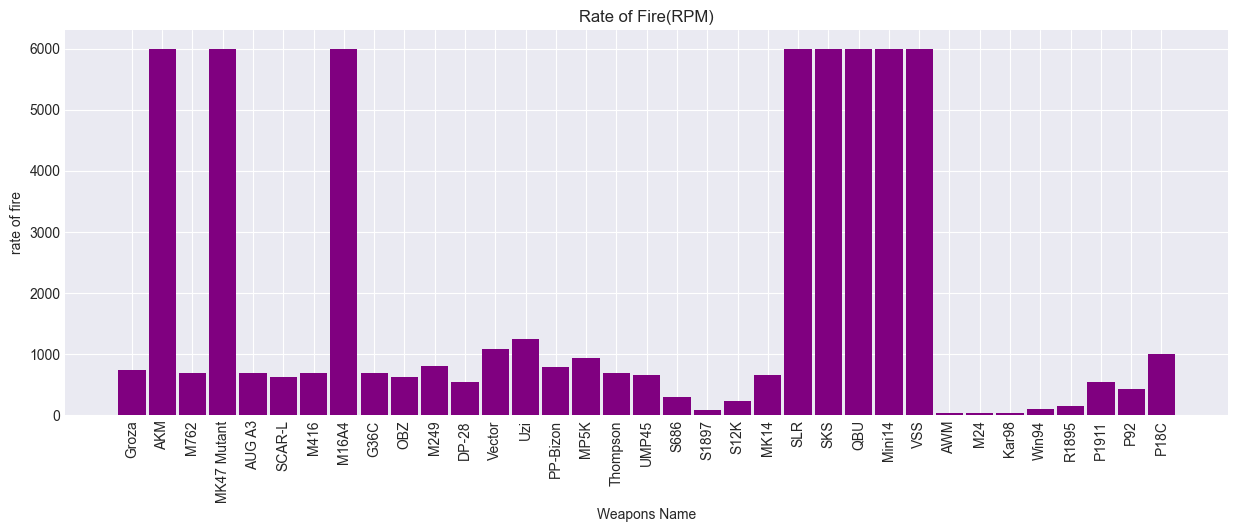

In [28]:
plt.figure(figsize=(15,5))
plt.bar(pubg_weapon_df["Weapon Name"],pubg_weapon_df["Rate of Fire"],width=0.9,color="Purple")
plt.xticks(rotation="vertical")
plt.title("Rate of Fire(RPM)")
plt.xlabel("Weapons Name")
plt.ylabel("rate of fire")
plt.show()

### How many shots to the chest are needed to kill with different weapons?

In [29]:
chest_shot = pubg_weapon_df.groupby("Weapon Name")["Shots to Kill (Chest)"].sum().sort_values().reset_index()
chest_shot

,Weapon Name,Shots to Kill (Chest)
0,S686,1
1,S1897,1
2,S12K,1
3,Win94,2
4,AWM,2
5,Kar98,2
6,M24,2
7,VSS,3
8,SLR,3
9,SKS,3


### How many shots to the head are needed to kill with different weapons?

In [30]:
head_shots = pubg_weapon_df.groupby("Weapon Name")["Shots to Kill (Head)"].sum().sort_values().reset_index()
head_shots

,Weapon Name,Shots to Kill (Head)
0,AWM,1
1,Kar98,1
2,S686,1
3,M24,1
4,S1897,1
5,S12K,1
6,AKM,2
7,VSS,2
8,SLR,2
9,SKS,2


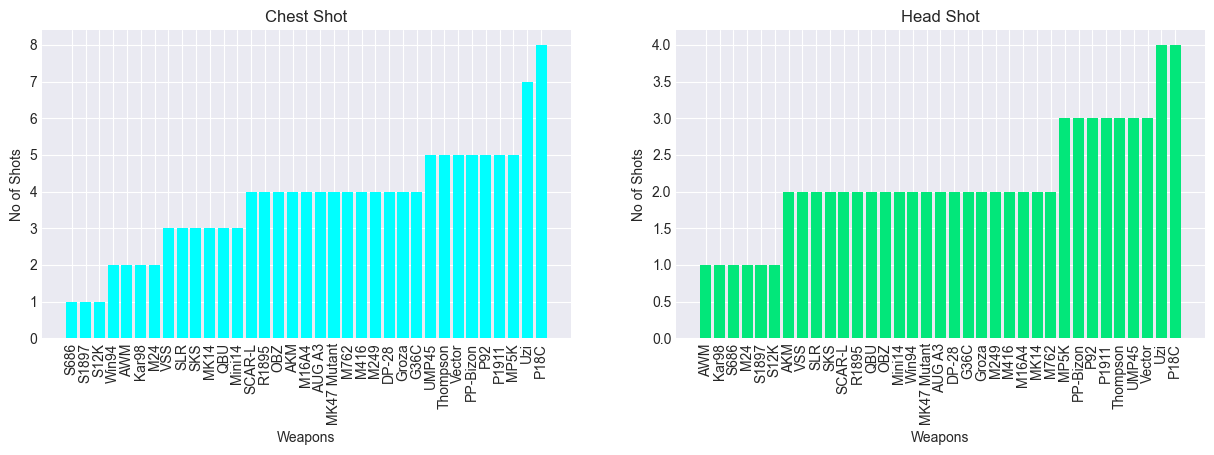

In [31]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax1.bar(chest_shot["Weapon Name"],chest_shot["Shots to Kill (Chest)"],color="Cyan")
plt.title("Chest Shot")
plt.xlabel("Weapons")
plt.ylabel("No of Shots")
plt.xticks(rotation="vertical")
ax2 = fig.add_subplot(122)
ax2.bar(head_shots["Weapon Name"],head_shots["Shots to Kill (Head)"],color="#02E77A")
plt.title("Head Shot")
plt.xlabel("Weapons")
plt.ylabel("No of Shots")
plt.xticks(rotation="vertical")
plt.show()

##### The S686 requires only one chest shot to kill, indicating its high stopping power at close range. Similarly, the AWM requires just one headshot to kill, showcasing its lethal precision and power at long distances.

### Average Damage considering Vest and Helmet vs Weapon type?

In [32]:
without_vest = pubg_weapon_df.groupby("Weapon Type")["BDMG_0"].mean().sort_values(ascending=False).reset_index()
without_vest

,Weapon Type,BDMG_0
0,Shotgun,231.600
1,Sniper Rifle,99.675
2,Designed Marksman Rifle,53.700
3,Light Machine Gun,48.000
4,Assault Rifle,43.700
5,Pistol,38.075
6,Submachine Gun,34.000


In [33]:
level_1_vest = pubg_weapon_df.groupby("Weapon Type")["BDMG_1"].mean().sort_values(ascending=False).reset_index()
level_1_vest

,Weapon Type,BDMG_1
0,Shotgun,162.300000
1,Sniper Rifle,69.725000
2,Designed Marksman Rifle,37.566667
3,Light Machine Gun,33.500000
4,Assault Rifle,31.640000
5,Pistol,26.650000
6,Submachine Gun,23.783333


In [34]:
level_2_vest = pubg_weapon_df.groupby("Weapon Type")["BDMG_2"].mean().sort_values(ascending=False).reset_index()
level_2_vest

,Weapon Type,BDMG_2
0,Shotgun,138.600000
1,Sniper Rifle,59.725000
2,Designed Marksman Rifle,32.183333
3,Light Machine Gun,28.800000
4,Assault Rifle,27.120000
5,Pistol,22.800000
6,Submachine Gun,20.383333


In [35]:
level_3_vest = pubg_weapon_df.groupby("Weapon Type")["BDMG_3"].mean().sort_values(ascending=False).reset_index()
level_3_vest

,Weapon Type,BDMG_3
0,Shotgun,104.100000
1,Sniper Rifle,44.825000
2,Designed Marksman Rifle,24.133333
3,Light Machine Gun,21.550000
4,Assault Rifle,20.290000
5,Pistol,17.100000
6,Submachine Gun,15.266667


In [36]:
without_helmet = pubg_weapon_df.groupby("Weapon Type")["HDMG_0"].mean().sort_values(ascending=False).reset_index()
without_helmet

,Weapon Type,HDMG_0
0,Shotgun,269.100000
1,Sniper Rifle,205.500000
2,Designed Marksman Rifle,120.216667
3,Light Machine Gun,110.350000
4,Assault Rifle,106.170000
5,Pistol,76.200000
6,Submachine Gun,61.200000


In [37]:
level_1_helmet = pubg_weapon_df.groupby("Weapon Type")["HDMG_1"].mean().sort_values(ascending=False).reset_index()
level_1_helmet

,Weapon Type,HDMG_1
0,Shotgun,188.400000
1,Sniper Rifle,143.825000
2,Designed Marksman Rifle,84.116667
3,Light Machine Gun,77.250000
4,Assault Rifle,74.330000
5,Pistol,53.325000
6,Submachine Gun,42.783333


In [38]:
level_2_helmet = pubg_weapon_df.groupby("Weapon Type")["HDMG_2"].mean().sort_values(ascending=False).reset_index()
level_2_helmet

,Weapon Type,HDMG_2
0,Shotgun,161.400000
1,Sniper Rifle,123.250000
2,Designed Marksman Rifle,72.100000
3,Light Machine Gun,66.150000
4,Assault Rifle,63.680000
5,Pistol,45.675000
6,Submachine Gun,36.666667


In [39]:
level_3_helmet = pubg_weapon_df.groupby("Weapon Type")["HDMG_3"].mean().sort_values(ascending=False).reset_index()
level_3_helmet

,Weapon Type,HDMG_3
0,Shotgun,120.900000
1,Sniper Rifle,92.525000
2,Designed Marksman Rifle,54.066667
3,Light Machine Gun,49.600000
4,Assault Rifle,47.750000
5,Pistol,34.275000
6,Submachine Gun,27.500000


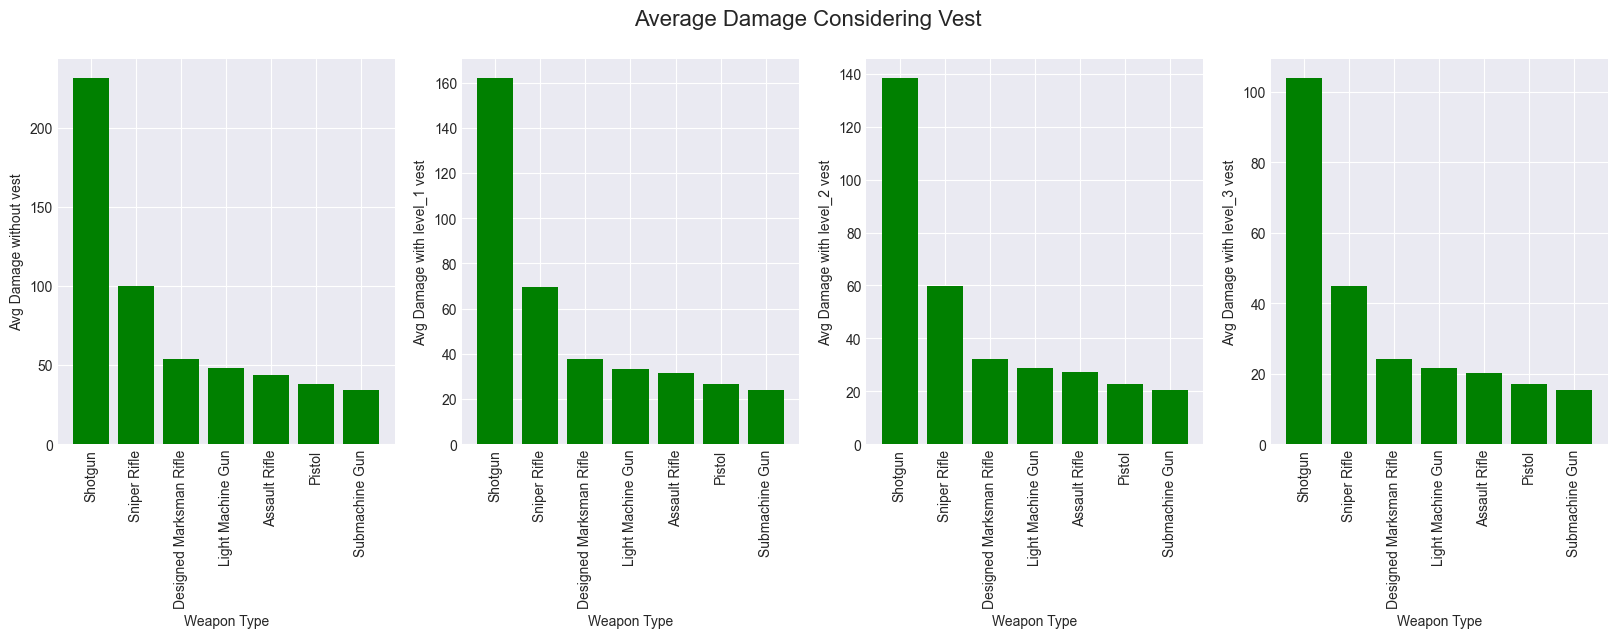

In [40]:
fig = plt.figure(figsize=(20,5))
fig.suptitle("Average Damage Considering Vest", fontsize=16) 
ax1 = fig.add_subplot(141)
ax1.bar(without_vest["Weapon Type"],without_vest["BDMG_0"],color="green")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage without vest")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(142)
ax1.bar(level_1_vest["Weapon Type"],level_1_vest["BDMG_1"],color="green")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_1 vest")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(143)
ax1.bar(level_2_vest["Weapon Type"],level_2_vest["BDMG_2"],color="green")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_2 vest")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(144)
ax1.bar(level_3_vest["Weapon Type"],level_3_vest["BDMG_3"],color="green")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_3 vest")
plt.xticks(rotation="vertical")
plt.show()

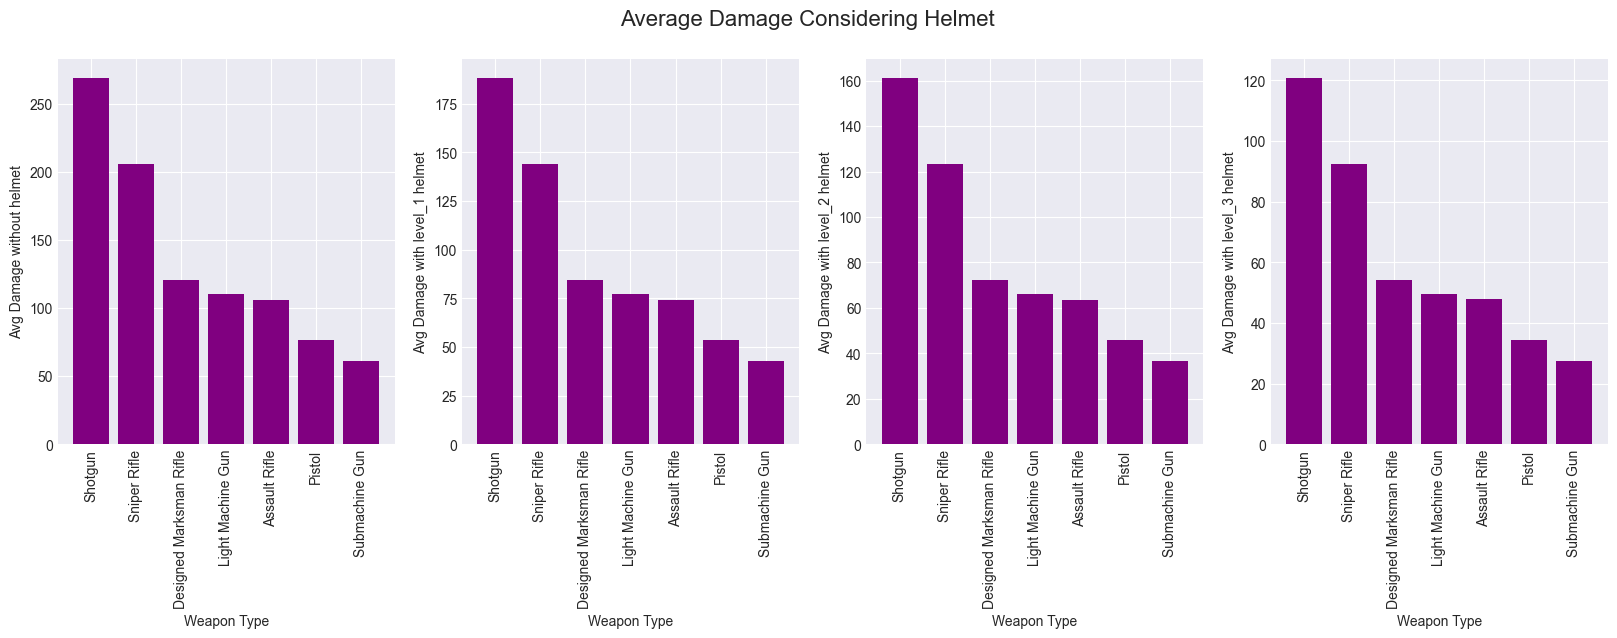

In [41]:
fig = plt.figure(figsize=(20,5))
fig.suptitle("Average Damage Considering Helmet", fontsize=16) 
ax1 = fig.add_subplot(141)
ax1.bar(without_helmet["Weapon Type"],without_helmet["HDMG_0"],color="purple")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage without helmet")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(142)
ax1.bar(level_1_helmet["Weapon Type"],level_1_helmet["HDMG_1"],color="purple")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_1 helmet")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(143)
ax1.bar(level_2_helmet["Weapon Type"],level_2_helmet["HDMG_2"],color="purple")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_2 helmet")
plt.xticks(rotation="vertical")
ax1 = fig.add_subplot(144)
ax1.bar(level_3_helmet["Weapon Type"],level_3_helmet["HDMG_3"],color="purple")
plt.xlabel("Weapon Type")
plt.ylabel("Avg Damage with level_3 helmet")
plt.xticks(rotation="vertical")
plt.show()

##### Shotguns inflict the highest damage across all scenarios, including hits on targets with and without vests and helmets. This demonstrates the exceptional stopping power of shotguns, making them highly effective at close range.

### Which weapon has the highest damage per second?

In [42]:
DPS = pubg_weapon_df.groupby("Weapon Name")["Damage Per Second"].sum().sort_values(ascending=False).reset_index()
DPS

,Weapon Name,Damage Per Second
0,S686,1080.00
1,S12K,792.00
2,MK14,678.00
3,Groza,612.00
4,M249,600.00
5,SLR,580.00
6,Vector,569.00
7,M762,547.00
8,Uzi,542.00
9,SKS,530.00


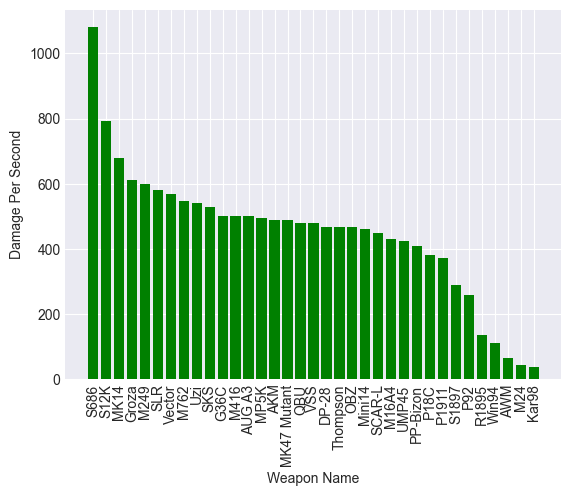

In [43]:
plt.bar(DPS["Weapon Name"],DPS["Damage Per Second"],color="green")
plt.xticks(rotation="vertical")
plt.xlabel("Weapon Name")
plt.ylabel("Damage Per Second")
plt.show()

##### S686 has highest damage per second

### How does DPS compare across different weapon types?

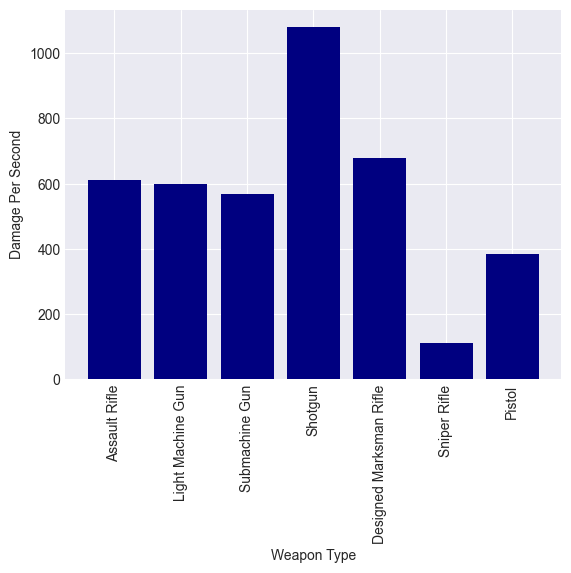

In [44]:
plt.bar(pubg_weapon_df["Weapon Type"],pubg_weapon_df["Damage Per Second"],color="#000080")
plt.xticks(rotation="vertical")
plt.xlabel("Weapon Type")
plt.ylabel("Damage Per Second")
plt.show()

##### Shotguns have the highest Damage Per Second (DPS) among all weapon types, indicating their superior firepower in close-range combat. This makes shotguns particularly effective for quickly eliminating targets.

### Compare the performance of weapons within the same type

In [48]:
weapon_types = pubg_weapon_df["Weapon Type"].unique()
performance_list = []
for weapon_type in weapon_types:
    weapon_data = pubg_weapon_df.groupby("Weapon Type").get_group(weapon_type)[["Weapon Name","Damage","Range","Rate of Fire"]].sort_values(["Damage","Range","Rate of Fire"],ascending=False)
    weapon_data["Weapon Type"] = weapon_type
    performance_list.append(weapon_data)
all_weapons_data = pd.concat(performance_list,ignore_index=True)   
all_weapons_data.reset_index(drop=True)
# performance_list

,Weapon Name,Damage,Range,Rate of Fire,Weapon Type
0,MK47 Mutant,49,500.0,6000.000000,Assault Rifle
1,AKM,49,400.0,6000.000000,Assault Rifle
2,Groza,49,400.0,750.000000,Assault Rifle
3,M762,47,400.0,697.674419,Assault Rifle
4,M16A4,43,600.0,6000.000000,Assault Rifle
5,AUG A3,43,600.0,697.674419,Assault Rifle
6,M416,43,600.0,697.674419,Assault Rifle
7,G36C,43,600.0,697.674419,Assault Rifle
8,SCAR-L,43,600.0,625.000000,Assault Rifle
9,OBZ,43,600.0,625.000000,Assault Rifle


### Conclusion

#### .Most weapons are Assault Rifles, with 7.62mm and 5.56mm bullets being the most common types. The S686 shotgun stands out with the highest damage per shot (216), while the P18C pistol has the lowest damage (23). The M249 boasts the highest magazine capacity (100 bullets). Shotguns, particularly the S686, deliver the highest damage per second (DPS), making them extremely effective in close-range combat. Weapons with higher bullet speeds generally have longer ranges, and while some weapon types have uniform magazine capacities, others vary. The S686 requires only one chest shot to kill, demonstrating its high stopping power at close range, while the AWM sniper rifle requires just one headshot to kill, highlighting its lethal precision at long distances. Shotguns consistently inflict the highest damage, whether targets are equipped with vests and helmets or not, underscoring their exceptional stopping power. Competitive players should strategically use shotguns for close-quarters dominance and sniper rifles like the AWM for long-range engagements, while considering high-capacity weapons like the M249 for sustained fire in extended battles.AR type guns are suitable for Short to average range fights